In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
file_path = r"C:\Users\Admin\Downloads\superstore.xlsx"
data = pd.read_excel(file_path)

data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,44256,44378,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,44317,44531,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
594,595,US-2021-141257,44414,14-06-2021,Standard Class,CS-11950,Carlos Soltero,Consumer,United States,Seattle,...,98115,West,FUR-CH-10002758,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",585.552,3,0.2,73.1940
595,596,US-2021-108147,44414,13-06-2021,Standard Class,RD-19480,Rick Duston,Consumer,United States,Long Beach,...,11561,East,OFF-BI-10003876,Office Supplies,Binders,"Green Canvas Binder for 8-1/2"" x 14"" Sheets",68.480,2,0.2,25.6800
596,597,US-2021-108147,44414,13-06-2021,Standard Class,RD-19480,Rick Duston,Consumer,United States,Long Beach,...,11561,East,OFF-ST-10003470,Office Supplies,Storage,"Tennsco Snap-Together Open Shelving Units, Sta...",1676.880,6,0.0,83.8440
597,598,US-2021-115812,44445,14-06-2021,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
598,599,US-2021-160262,44445,13-06-2021,Second Class,TS-21205,Thomas Seio,Corporate,United States,North Las Vegas,...,89031,West,FUR-FU-10002685,Furniture,Furnishings,"Executive Impressions 13-1/2"" Indoor/Outdoor W...",37.400,2,0.0,14.2120


In [ ]:
data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Country/Region     object
City               object
State/Province     object
Postal Code        object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
dtype: object

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 21)


In [ ]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [ ]:
data = data.dropna()
data.count()

Row ID            599
Order ID          599
Order Date        599
Ship Date         599
Ship Mode         599
Customer ID       599
Customer Name     599
Segment           599
Country/Region    599
City              599
State/Province    599
Postal Code       599
Region            599
Product ID        599
Category          599
Sub-Category      599
Product Name      599
Sales             599
Quantity          599
Discount          599
Profit            599
dtype: int64

In [ ]:
#Splitting the Dataset into the Training Set and Test Set

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data[['Sales', 'Quantity', 'Discount']]
y = data['Profit']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

#Interpretation
The dataset is split into training (80%) and test (20%) sets,
with Sales, Quantity, and Discount as predictors (X) and Profit
as the target (y).
This ensures that the model can learn patterns from X_train,
y_train and validate performance using X_test, y_test.


X_train shape: (479, 3)
X_test shape: (120, 3)
y_train shape: (479,)
y_test shape: (120,)


In [ ]:
# Import required library
from sklearn.model_selection import train_test_split

# Define bins and labels for categorizing 'Profit'
bins = [-float('inf'), 0, 50, float('inf')]  # Example bins: negative profit, low profit, high profit
labels = ['Loss', 'Low Profit', 'High Profit']

# Create a new categorical column for the target variable
data['Profit_Category'] = pd.cut(data['Profit'], bins=bins, labels=labels, include_lowest=True)

# Define features (X) and new categorical target (y)
X = data[['Sales', 'Quantity', 'Discount']]
y = data['Profit_Category']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the target variable for confirmation
print(data[['Profit', 'Profit_Category']].head())
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


#Interpretation
The Profit column is categorized into three levels (Loss, Low Profit, High Profit)
using specified bins, creating a new target variable Profit_Category.
The dataset is then split into training (80%) and test (20%) sets, with Sales,
Quantity, and Discount as predictors (X) and Profit_Category as the target (y).








    Profit Profit_Category
0   5.5512      Low Profit
1  -5.4870            Loss
2   4.2717      Low Profit
3 -64.7748            Loss
4   4.8840      Low Profit
X_train shape: (479, 3)
X_test shape: (120, 3)
y_train shape: (479,)
y_test shape: (120,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm shapes and view the scaled data
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("Sample scaled data (X_train):\n", X_train_scaled[:5])

#Interpretation
he StandardScaler standardizes the X_train and X_test features by
removing the mean and scaling to unit variance, ensuring consistent
feature scales for better model performance.
fit_transform is applied to X_train, while transform is used on X_test
to maintain consistency with training data scaling.

X_train_scaled shape: (479, 3)
X_test_scaled shape: (120, 3)
Sample scaled data (X_train):
 [[ 0.35283648 -0.34450389  0.28298448]
 [-0.19215701  0.10636322 -0.70823721]
 [-0.08390398 -0.34450389  0.28298448]
 [-0.21764544 -0.79537101  2.76103872]
 [-0.14650527 -1.24623812 -0.70823721]]


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Interpretation
The KNeighborsClassifier model is initialized with n_neighbors=5,
meaning it will classify data points based on the majority class
of their 5 nearest neighbors in the feature space.

KNeighborsClassifier()

In [ ]:
Making the Confusion Matrix

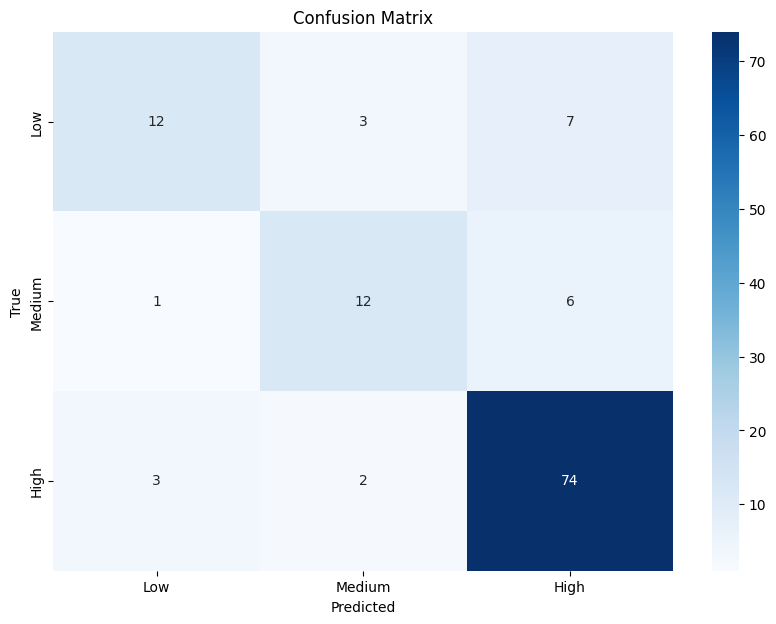

              precision    recall  f1-score   support

 High Profit       0.75      0.55      0.63        22
        Loss       0.71      0.63      0.67        19
  Low Profit       0.85      0.94      0.89        79

    accuracy                           0.82       120
   macro avg       0.77      0.70      0.73       120
weighted avg       0.81      0.82      0.81       120



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))

#Interpretation
Confusion Matrix:
The heatmap visualizes the confusion matrix, showing how many test samples were correctly classified (diagonal values) and misclassified (off-diagonal values) across the categories (Low, Medium, High).
It highlights the performance of the model for each category and identifies where it struggles (e.g., confusion between Low and Medium categories).

Classification Report:
Provides detailed metrics for each class:
Precision: The percentage of correctly predicted instances out of all instances predicted for that class.
Recall: The percentage of correctly predicted instances out of all actual instances of that class.
F1-Score: The harmonic mean of precision and recall, balancing both metrics.
Also includes overall metrics like accuracy, macro-average, and weighted-average, summarizing the model's performance across all classes.



In [ ]:
y_pred = knn.predict(X_test)
print("Prediction for test set: {}".format(y_pred))

#Interpretation
The predict method is used to classify the test set (X_test) based
on the KNN model trained earlier, generating predictions stored in y_pred.
The predictions represent the estimated categories for the target variable
(Profit_Category) of the test set, which can be compared to actual values (y_test) for evaluation.

Prediction for test set: ['Low Profit' 'Low Profit' 'Low Profit' 'Loss' 'High Profit' 'Loss'
 'Low Profit' 'Loss' 'Low Profit' 'Low Profit' 'Low Profit' 'Loss'
 'Low Profit' 'Low Profit' 'Low Profit' 'Loss' 'High Profit' 'Low Profit'
 'Low Profit' 'Low Profit' 'Low Profit' 'Loss' 'Low Profit' 'Low Profit'
 'Low Profit' 'High Profit' 'Low Profit' 'Low Profit' 'High Profit'
 'Low Profit' 'Loss' 'Low Profit' 'Low Profit' 'Low Profit' 'Low Profit'
 'Loss' 'High Profit' 'High Profit' 'Low Profit' 'Low Profit' 'Loss'
 'High Profit' 'High Profit' 'Low Profit' 'Loss' 'Low Profit' 'Low Profit'
 'Low Profit' 'Low Profit' 'Low Profit' 'High Profit' 'Loss' 'High Profit'
 'High Profit' 'Low Profit' 'Low Profit' 'Low Profit' 'Low Profit'
 'Low Profit' 'Low Profit' 'Low Profit' 'Low Profit' 'Loss' 'Low Profit'
 'High Profit' 'Low Profit' 'High Profit' 'Loss' 'Low Profit' 'Low Profit'
 'Low Profit' 'Low Profit' 'Low Profit' 'Low Profit' 'Low Profit'
 'Low Profit' 'Low Profit' 'Low Profit' 'High Profit

In [ ]:
Calculating the Accuracy Score for Different 'k' Values

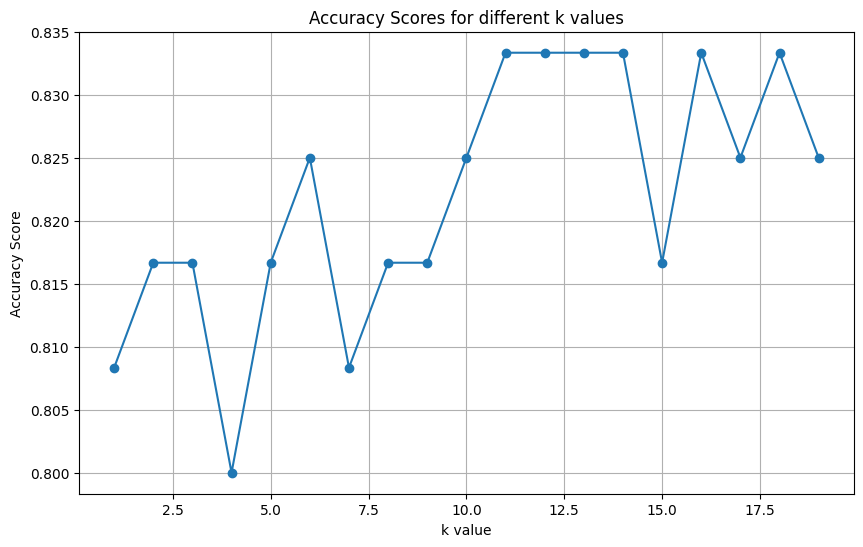

In [ ]:
accuracy_scores = []
k_values = range(1, 20)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy Scores for different k values')
plt.xlabel('k value')
plt.ylabel('Accuracy Score')
plt.grid()
plt.show()

#Interpretation
This code evaluates the model's accuracy for different values of k (number of neighbors)
in the KNN algorithm. The goal is to find the optimal k that provides the highest accuracy on the test set.

In [ ]:
Comparative Analysis of Obtained Accuracy with Various Distances and k Values Using a Suitable Plot

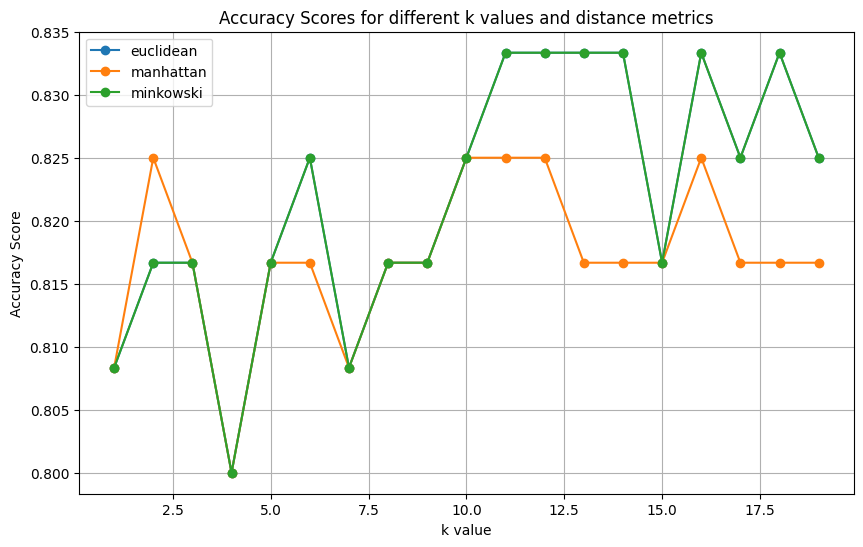

In [ ]:
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
accuracy_scores = {metric: [] for metric in distance_metrics}
k_values = range(1, 20)

for metric in distance_metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy_scores[metric].append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
for metric in distance_metrics:
    plt.plot(k_values, accuracy_scores[metric], marker='o', label=metric)

plt.title('Accuracy Scores for different k values and distance metrics')
plt.xlabel('k value')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid()
plt.show()

#Interpretation
This code evaluates the accuracy of the KNN model using different distance metrics
(euclidean, manhattan, minkowski) for each value of k (number of neighbors).
The goal is to compare how each distance metric influences the model's accuracy.

In [ ]:
Visualizing the Training/Testing Set Results

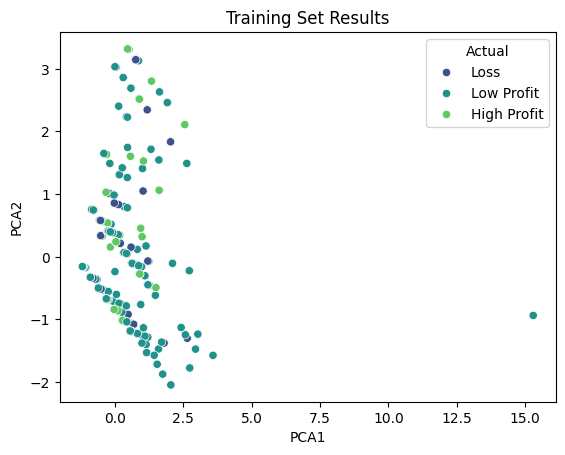

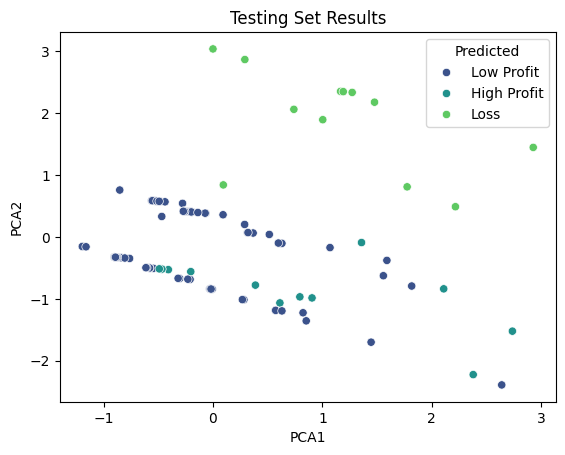

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

train_data = pd.DataFrame(data=X_train_pca, columns=['PCA1', 'PCA2'])
train_data['Actual'] = y_train

sns.scatterplot(x='PCA1', y='PCA2', hue='Actual', data=train_data, palette='viridis')
plt.title('Training Set Results')
plt.show()

test_data = pd.DataFrame(data=X_test_pca, columns=['PCA1', 'PCA2'])
test_data['Actual'] = y_test
test_data['Predicted'] = y_pred

sns.scatterplot(x='PCA1', y='PCA2', hue='Predicted', data=test_data, palette='viridis')
plt.title('Testing Set Results')
plt.show()

#Interpretation
Training Set Visualization-

The training set plot shows how the data points are distributed across the two principal components.
    The color coding by actual labels helps to see the natural grouping of different classes in the
    reduced space. Good separation of clusters indicates that the classes are distinguishable based
on the features. Testing Set Visualization:

The test set plot shows the predicted labels in the 2D PCA space. Comparing the predicted labels with
the actual distribution can give insights into the classifier's performance. Misclassified points
(where the predicted label does not match the majority of nearby actual labels) can be identified visually.
By comparing these plots, one can gauge the classifier's effectiveness and identify areas where it may struggle to differentiate between classes.